('Largest eigenvalue:', 1.5956004659878684)
('Smallest eigenvalue:', -3.0973087284448135e-16)


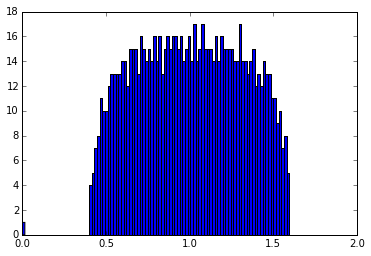

In [2]:
%matplotlib inline
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt

n = 1000 # 1000 nodes
m = 5000 # 5000 edges
G = nx.gnm_random_graph(n,m)

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)

print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e,bins=100) # histogram with 100 bins
plt.xlim(0,2)  # eigenvalues between 0 and 2
plt.show()

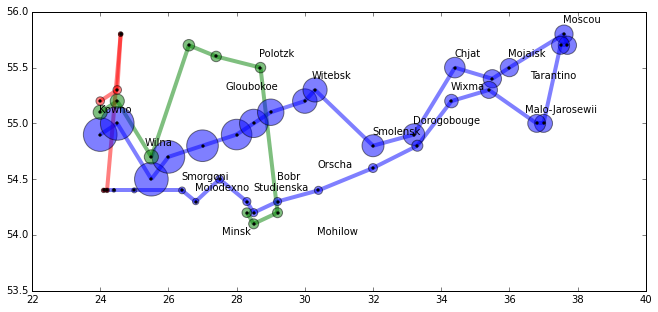

In [3]:
import string
import networkx as nx


def minard_graph():
    data1="""\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2="""\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3="""\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities="""\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c={}
    for line in cities.split('\n'):
        x,y,name=line.split(',')
        c[name]=(float(x),float(y))

    g=[]

    for data in [data1,data2,data3]:
        G=nx.Graph()
        i=0
        G.pos={} # location
        G.pop={} # size
        last=None
        for line in data.split('\n'):
            x,y,p,r,n=line.split(',')
            G.pos[i]=(float(x),float(y))
            G.pop[i]=int(p)
            if last is None:
                last=i
            else:
                G.add_edge(i,last,{r:int(n)})
                last=i
            i=i+1
        g.append(G)

    return g,c

if __name__ == "__main__":

    (g,city)=minard_graph()

    try:
        import matplotlib.pyplot as plt
        plt.figure(1,figsize=(11,5))
        plt.clf()
        colors=['b','g','r']
        for G in g:
            c=colors.pop(0)
            node_size=[int(G.pop[n]/300.0) for n in G]
            nx.draw_networkx_edges(G,G.pos,edge_color=c,width=4,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=node_size,node_color=c,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=5,node_color='k')

        for c in city:
            x,y=city[c]
            plt.text(x,y+0.1,c)
        plt.savefig("napoleon_russian_campaign.png")
    except ImportError:
        pass

{'a': array([ 0.25334029,  0.        ]), 'c': array([ 0.6305601 ,  0.50315739]), 'b': array([ 0.        ,  0.38127281]), 'e': array([ 0.47755435,  0.93256359]), 'd': array([ 1.        ,  0.38023726]), 'f': array([ 0.79044838,  0.02662923])}


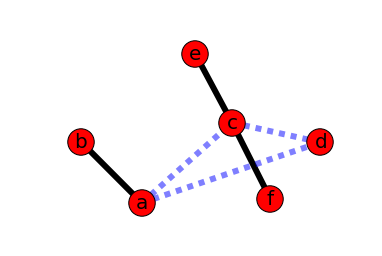

In [4]:
G=nx.Graph()

G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.7)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes
print(pos)
# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

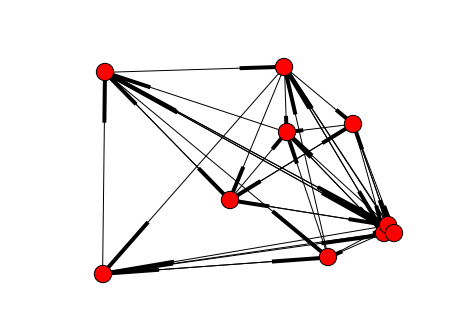

In [5]:
import numpy
import matplotlib.pyplot as plt
a = numpy.reshape(numpy.random.random_integers(0,1,size=100),(10,10))
D = nx.DiGraph(a)
nx.drawing.nx_pylab.draw_random(D)

{1: <matplotlib.text.Text at 0x108ac4a90>,
 2: <matplotlib.text.Text at 0x108aa9390>,
 3: <matplotlib.text.Text at 0x108aa9890>,
 4: <matplotlib.text.Text at 0x108bedc90>}

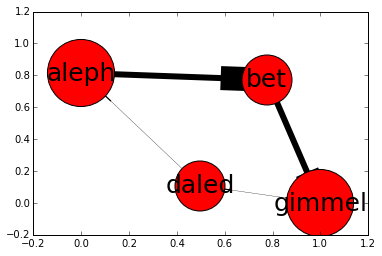

In [7]:

G=nx.DiGraph()

G.add_edge(1,2, weight=0.3)  # default edge data=1
G.add_edge(1,2, weight=1.3)  # default edge data=1
G.add_edge(2,3,weight=12.9) # specify edge data
G.add_edge(3, 4,weight=120.9) # specify edge data
G.add_edge(4,1,weight=90.9) # specify edge data

pos=nx.spring_layout(G) # positions for all nodes

names = {1:'aleph', 2:'bet', 3:'gimmel', 4:'daled'}



#nx.draw_networkx(G, pos, arrows=True, node_size=2000, labels=names, width=.2)
#G.edges()
#print(G.nodes())
nx.draw_networkx_nodes(G, pos, nodelist=[1,3], node_size=4500)
nx.draw_networkx_nodes(G, pos, nodelist=[2,4], node_size=2500)

nx.draw_networkx_edges(G, pos, edgelist=[(1,2), (2,3)], width=6)
nx.draw_networkx_edges(G, pos, edgelist=[(3,4), (4,1)], width=0.3)

nx.draw_networkx_labels(G, pos, font_size=25, labels=names)
#nx.draw_networkx_labels(G,pos,labels,font_size=16)